# Symbolic Computation with SymPy

This Notebook closely follows the SymPy tutorial.

In [1]:
from __future__ import division
import sympy as sym

import math

### Using SymPy Interactively

To use SymPy interatively in a calculator-like environment, we will import everything and initialize printing. 

In [2]:
from sympy import *

# make things look pretty in the notebook
from sympy.interactive import printing
printing.init_printing()

### Basic Symbolic Manipulation

In [3]:
print(math.sqrt(2)**2)

2.0000000000000004


In [4]:
print(sym.sqrt(2)**2)

2


In [5]:
print(sym.sqrt(8)**2)

8


We can do symbolic math not just on numbers, but we can tell SymPy what to treat as a variable.

In [6]:
x, y, z = sym.symbols("x y z")

In [7]:
expr = x + 2*y
expr

In [8]:
expr - 1

In [9]:
expr - y

In [10]:
f = x*expr
f

In [11]:
g = sym.expand(f)
g

In [12]:
sym.simplify(g**2)

### Substitution

In [13]:
expr = sym.sin(x*2*sym.pi)
expr

In [14]:
expr.subs(x,1)

In [15]:
a = expr.subs(x,0.125)
a

In [16]:
type(a)

sympy.core.mul.Mul

Note that this is not a floating point number -- it is still a SymPy object.  To make it floating point, we can use evalf().

In [17]:
b = a.evalf()
print(b, type(b))

0.707106781186548 <class 'sympy.core.numbers.Float'>


This is still a SymPy object, because SymPy can do arbitrary precision.

In [18]:
sym.pi.evalf(100)

Want regular python types?

In [19]:
c = float(b)
print(c, type(c))

0.7071067811865476 <class 'float'>


### Python and SymPy

SymPy symbols are just objects and when you do operations on two sympy objects the result is a sympy object.  When you combine a sympy and python object, the result is also a sympy object.  But now we need to be careful when doing fractions.  For instance doing x + 1/3 will first compute 1/3 in python (giving 0 or 0.333... depending on the division operator) and then add it to the sympy x symbol.  The Rational() function makes this all happen in sympy.

In [20]:
f = expr + Rational(1,3)
f

In [21]:
expr + 1/3

### Equality

= is still the assignment operator of python (it does not mean symbolic equality), and == is still the logical test (exact structural equality).  There is a separate object, Eq() to specify symbolic equality

In [22]:
x + 1 == 4

False

In [23]:
Eq(x + 1, 4)

In [24]:
a = (x + 1)**2
b = x**2 + 2*x + 1    # these are algebraically equal

In [25]:
a == b

False

In [26]:
simplify(a - b)   # this will test equality algebraically

In [27]:
a = cos(x) + sym.I*sin(x)
a

In [28]:
simplify(a)

### More Substitution

Note that substitution returns a new expression: SymPy objects are immutable.

In [29]:
expr = cos(x)
expr.subs(x, 0)

In [30]:
expr

In [31]:
x

Multiple substitutions by passing a list of tuples.

In [32]:
expr = x**3 + 4*x*y - z
expr

In [33]:
expr.subs([(x, 2), (y, 4), (z, 0)])

### Simplifying

There is not unique definition of what the simplest form of an expression is.

simplify() tries lots of methods for simplification.

In [34]:
simplify(sin(x)**2 + cos(x)**2)

In [35]:
simplify( (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1) )

In [36]:
simplify(gamma(x)/gamma(x - 2))

However, sometimes it doesn't have your idea of what the simplest form is.

In [37]:
simplify(x**2 + 2*x + 1)

Instead, factor may be what you want.

In [38]:
factor(x**2 + 2*x + 1)

### Polynomial Simplification

In [39]:
expand((x + 1)**2)

In [40]:
expand((x + 2)*(x - 3))

In [41]:
expand( (x + 1)*(x - 2) - (x - 1)*x)

In [42]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [43]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

`collect` collects common powers.

In [44]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [45]:
collected_expr = collect(expr, x)
collected_expr

`cancel` cancels.

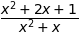

In [46]:
a = (x**2 + 2*x + 1)/(x**2 + x)
a

In [47]:
cancel(a)

`trigsimp` simplifies trigonometric identities.

In [48]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [49]:
trigsimp(sin(x)*tan(x)/sec(x))

The tutorial discusses some of the nuances of simplification of powers and special functions.

### Calculus

Derivatives.

In [50]:
diff(cos(x), x)

In [51]:
diff(exp(x**2), x, 2).subs(x, 5).evalf()

Third derivative:

In [52]:
diff(x**4, x, 3)

Differentiate different variables:

In [53]:
expr = exp(x*y*z)
diff(expr, y, x, z)

Unevaluated derivatied:

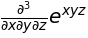

In [54]:
deriv = Derivative(expr, x, y, z)
deriv

In [55]:
deriv.doit()

Integrals:

In [56]:
integrate(cos(x), x)

Definite integral:

In [57]:
integrate(exp(-x), (x, 0, oo))

Double integral:

In [58]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

If it is unable to do the integral, it returns an Integral object:

Integral(x**x, x)


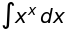

In [59]:
expr = integrate(x**x, x)
print(expr)
expr

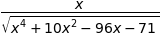

In [60]:
a = x / sqrt(x**4 + 10*x**2 - 96*x - 71)   # example from Wikipedia Risch algorithm page)
a

In [61]:
sym.printing.python(a)

"x = Symbol('x')\ne = x/sqrt(x**4 + 10*x**2 - 96*x - 71)"

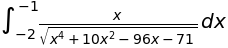

In [62]:
integrate(a, (x, -2, -1))     # this has a known solution, but SymPy fails to find it

Limits:

In [63]:
limit(sin(x)/x, x, 0)

Series expansions:

In [64]:
expr = exp(sin(x))
a = expr.series(x, 0, 10)    # expansion about x=0 up to 6th order

Note: For SymPy 0.7.5 and earlier, the order term O() is only supported for expansions about 0 or oo.  So when you compute the series about a point other than 0 or oo, the result will be shifted to 0.  You need to shift back by first removing the O() term.

In [65]:
print(a)

1 + x + x**2/2 - x**4/8 - x**5/15 - x**6/240 + x**7/90 + 31*x**8/5760 + x**9/5670 + O(x**10)


For SymPy 0.7.6, this is not an issue:

In [66]:
c = log(x).series(x, x0=1, n=6)
c

In [67]:
sym.printing.ccode(simplify(c.removeO()))

'(1.0L/5.0L)*pow(x, 5) - 5.0L/4.0L*pow(x, 4) + (10.0L/3.0L)*pow(x, 3) - 5*pow(x, 2) + 5*x - 137.0L/60.0L'

### Solvers

If no Eq() is done, then it is assumed to be equal to 0.

In [68]:
solve(Eq(x**2, 1), x)

In [69]:
solve(x**2 - 1, x)

In [70]:
solve([x - y + 2, x + y - 3], [x, y])

Roots will report if a solution is multiple by listing it multiple times.

In [71]:
roots(x**3 - 6*x**2 + 9*x, x)

0 is 1 root, and 3 is 2 more roots:

Differential Equations:

You need an undefined function (f and g already are by our init_session() above, but we've probably reset these:

In [72]:
f, g = symbols('f g', cls=Function)

In [73]:
f(x)

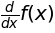

In [74]:
f(x).diff(x)

In [75]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x), sin(x))

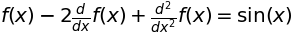

In [76]:
diffeq

In [77]:
dsolve(diffeq, f(x))

In [78]:
integrate(sin(x)**2, (x, 0, 1))

In [79]:
xs = solve(x**4 + 10*x**2 - 96*x - 71)

In [80]:
xs[2].evalf()